In [1]:
import datetime as dt
import os, sys
import netCDF4 as nc
import matplotlib as mpl
import numpy as np
import numpy.ma as ma
from scipy.spatial import distance
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import cm
import matplotlib.colors as mpl_colors
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable
import pandas as pd



from salishsea_tools import geo_tools, viz_tools

get_ipython().magic('matplotlib inline')

In [2]:
#Parameters

cmap = plt.get_cmap('nipy_spectral')
cmap.set_bad('burlywood')

H = 24 #One day in hours

#Ariane parameters
tunit= 3600

outint = 20 * 60 # 20 min in seconds

pph = int(tunit / outint) #points per hour

lmt = 1896 #points per particle


#RUN parameters

nday= 50

basedir = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/"

plotsdir = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/plots"


position = nday * pph * H # d * num/h * h/d = num

In [3]:
#function to get points from an indiviual month

def get_pts(direct):
    
    points = []
        
    particle = 1 #start particle counter
    
    start = dt.datetime.now()
    print ("start {}: ".format(direct), start)


    with open(basedir + direct + "/traj.txt") as file:

        for i, line in enumerate(file):

            line = line.strip('\n').split()

            line = [float(k) for k in line]

            line = np.array(line)


            if line[0] == particle:
                index = i + position
                particle += 1

            if i == index:
                points.append (line)
                
        print ("time: ", dt.datetime.now() - start)
                
                
    return points

In [4]:
# # test cell

# year0 = year1 = year2 = [] #for each depth

# jan = get_pts("/ocean/gsgarbi/analysis-giorgio/time_series/results2016/20160101_20160131_427d/")

# feb = get_pts("/ocean/gsgarbi/analysis-giorgio/time_series/results2016/20160201_20160229_401d/")


# year0 = jan[0::3] + feb[0::3]
# year1 = jan[1::3] + feb[1::3]
# year2 = jan[2::3] + feb[2::3]



In [5]:
# Get points for the year - this process should take about 42min for 12 months (3.5min per month)

path = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/"

dirs = os.listdir( path )

dirs.sort()

    


In [6]:
def plot(points, title = 'title', picname = "noname"):
    
    Iona = (-123.30898284912109, 49.187351226806641)
    S15 = (-123.3114, 49.130412)
    S16 = (-123.317415, 49.1214)
    xl=(-126.2,-122.2)
    yl=(47.1,51)




    #prepare plot and constants
    plt.clf()
    start = dt.datetime.now()
    print ("start: ", start)
    mesh = nc.Dataset("/ocean/gsgarbi/mesh_mask_downbyone2.nc")
    tmask=np.copy(mesh.variables['tmask'])
    mesh.close()
    fb=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
    nav_lon=np.copy(fb.variables['nav_lon'])
    nav_lat=np.copy(fb.variables['nav_lat'])
    fb.close()
    
    lonlim=[np.min(nav_lon),np.max(nav_lon)]
    latlim=[np.min(nav_lat),np.max(nav_lat)]


    griddata=0.0*tmask[0,0,:,:]

    np.shape(points)[0]



    griddata, iedges, jedges = np.histogram2d(points[:,1],points[:,2],bins=[100,200],range=[lonlim,latlim])


    Jedges,Iedges=np.meshgrid(jedges,iedges)
    


    fig, axs = plt.subplots(1,1,figsize=(9,8))
    mesh0 = axs.pcolormesh(Iedges,Jedges,griddata,cmap=cmap)
    mesh0.set_clim(vmin = 0, vmax = 40)
    axs.set_xlim(xl)
    axs.set_ylim(yl)
    pos=axs.get_position()
    pos2=(pos.bounds[0],pos.bounds[1],pos.bounds[2]-.05,pos.bounds[3])
    axs.set_position(pos2)
    axs2 = plt.axes(pos2)
    viz_tools.set_aspect(axs,coords='map')
    mesh1=axs2.pcolormesh(nav_lon,nav_lat,np.ma.masked_where(tmask[0,0,:,:]==1,tmask[0,0,:,:]),cmap='YlOrRd')
    axs2.set_xlim(xl)
    axs2.set_ylim(yl)
    axs2.patch.set_alpha(0)
    viz_tools.set_aspect(axs2,coords='map')
    axsCB=plt.axes((pos2[0]+pos2[3],pos2[1],.02,pos2[3]))
    cbar = fig.colorbar(mesh0,cax=axsCB)
    cbar.set_label ("Counts")
    
    axs.set_title(title)

    
    plt.savefig(picname)
    
    print ("We have a total of {} trajectories".format(np.sum(griddata)))

In [7]:
year1 = []
year2 = []
year3 = []

for file in dirs:
    month = get_pts(file)
    year1 += month [0::3]
    year2 += month [1::3]
    year3 += month [2::3]


start 20160101_20160131_427d:  2017-04-21 11:36:46.411071
time:  0:03:36.560367
start 20160201_20160229_401d:  2017-04-21 11:40:22.972686
time:  0:03:09.697879
start 20160301_20160331_355d:  2017-04-21 11:43:32.671504
time:  0:03:03.457051
start 20160401_20160430_325d:  2017-04-21 11:46:36.129518
time:  0:02:40.274844
start 20160501_20160531_294d:  2017-04-21 11:49:16.405366
time:  0:02:31.464358
start 20160601_20160630_264d:  2017-04-21 11:51:47.870749
time:  0:02:10.111651
start 20160701_20160731_252d:  2017-04-21 11:53:57.983545
time:  0:02:06.627903
start 20160801_20160831_217d:  2017-04-21 11:56:04.612560
time:  0:01:50.227508
start 20160901_20160930_172d:  2017-04-21 11:57:54.841143
time:  0:01:24.739109
start 20161001_20161031_141d:  2017-04-21 11:59:19.581311
time:  0:01:11.922835
start 20161101_20161130_111d:  2017-04-21 12:00:31.505138
time:  0:00:53.907130
start 20161201_20161231_95d:  2017-04-21 12:01:25.413020
time:  0:00:47.980668
start 20170101_20170131_77d:  2017-04-21 

In [8]:
#check pickle later

start:  2017-04-21 12:02:54.506793
We have a total of 9216.0 trajectories


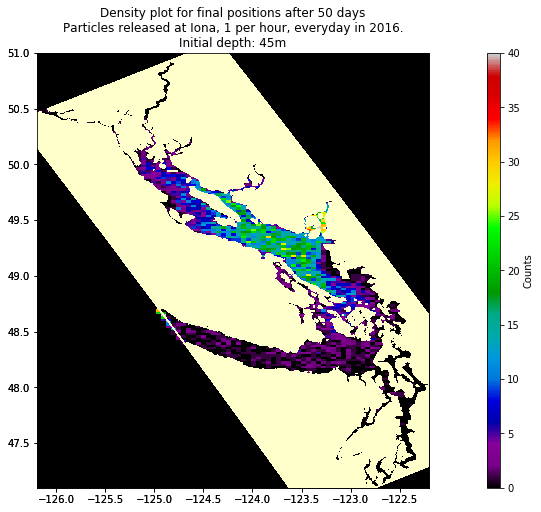

In [9]:
points = np.array(year1) #back to original name. convert to np.array

depth = 45

title = (
    "Density plot for final positions after {} days\n"
    "Particles released at Iona, 1 per hour, everyday in 2016.\n"
    "Initial depth: {}m".format(nday, depth)
)

picname = "/ocean/gsgarbi/analysis-giorgio/2017apr20_presentation/{}d_{}m".format(nday, depth)

plot (points, title, picname)

start:  2017-04-21 12:02:55.697508
We have a total of 9216.0 trajectories


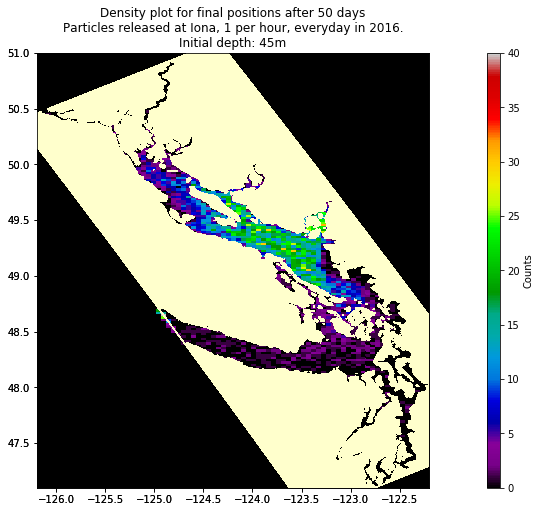

In [10]:
points = np.array(year2) #back to original name. convert to np.array

picname = "/ocean/gsgarbi/analysis-giorgio/2017apr20_presentation/{}d_{}m".format(nday, depth)

title = (
    "Density plot for final positions after {} days\n"
    "Particles released at Iona, 1 per hour, everyday in 2016.\n"
    "Initial depth: {}m".format(nday, depth)
)

plot (points, title, picname)

start:  2017-04-21 12:02:57.456925
We have a total of 9215.0 trajectories


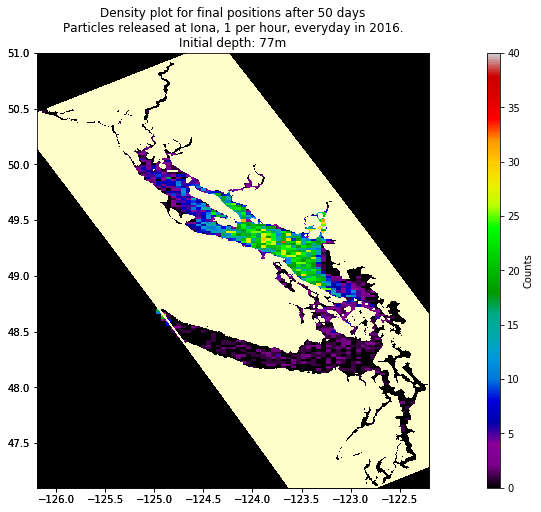

In [11]:
points = np.array(year3) #back to original name. convert to np.array

depth = 77

picname = "/ocean/gsgarbi/analysis-giorgio/2017apr20_presentation/{}d_{}m".format(nday, depth)

title = (
    "Density plot for final positions after {} days\n"
    "Particles released at Iona, 1 per hour, everyday in 2016.\n"
    "Initial depth: {}m".format(nday, depth)
)

plot (points, title, picname)

In [28]:
def plot_hist (pts, nday, init_depth):
    npyear=np.array(pts)

    df=pd.DataFrame(data=npyear[:,1:],index=npyear[:,0],columns=['Lon','Lat','Z','tind'])

    df2=df[(df.Lat>48.6) & (df.Lat<49.6)]

    n, bins, patches=plt.hist(df2['Z'],50,orientation='horizontal')
    plt.xlabel('Count')
    plt.ylabel('Depth (m)')
    
    title = ("Length of trajectory: {} days\n"
                    "Initial depth: {}m".format(nday, init_depth))
    
    plt.title ( title )
    
    plt.savefig( "/ocean/gsgarbi/analysis-giorgio/2017apr20_presentation/hist_{}d_{}m".format(nday, init_depth) )

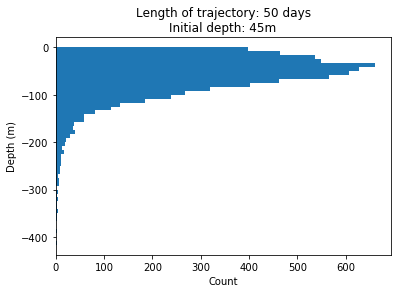

In [29]:
plot_hist(pts = year1, nday = nday, init_depth = 45)

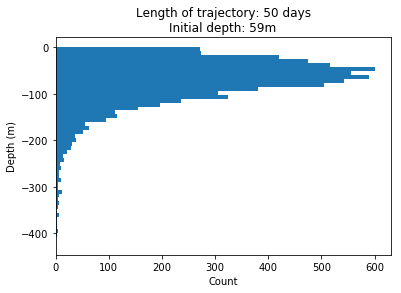

In [32]:
plot_hist(pts = year2, nday = nday, init_depth = 59)

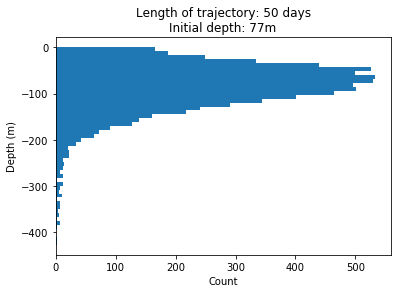

In [33]:
plot_hist(pts = year3, nday = nday, init_depth = 77)